<a href="https://colab.research.google.com/github/aqsabrekhna/Machine-learning-Training/blob/main/classification%20model%20for%20continuous%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (777, 18)
  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16  

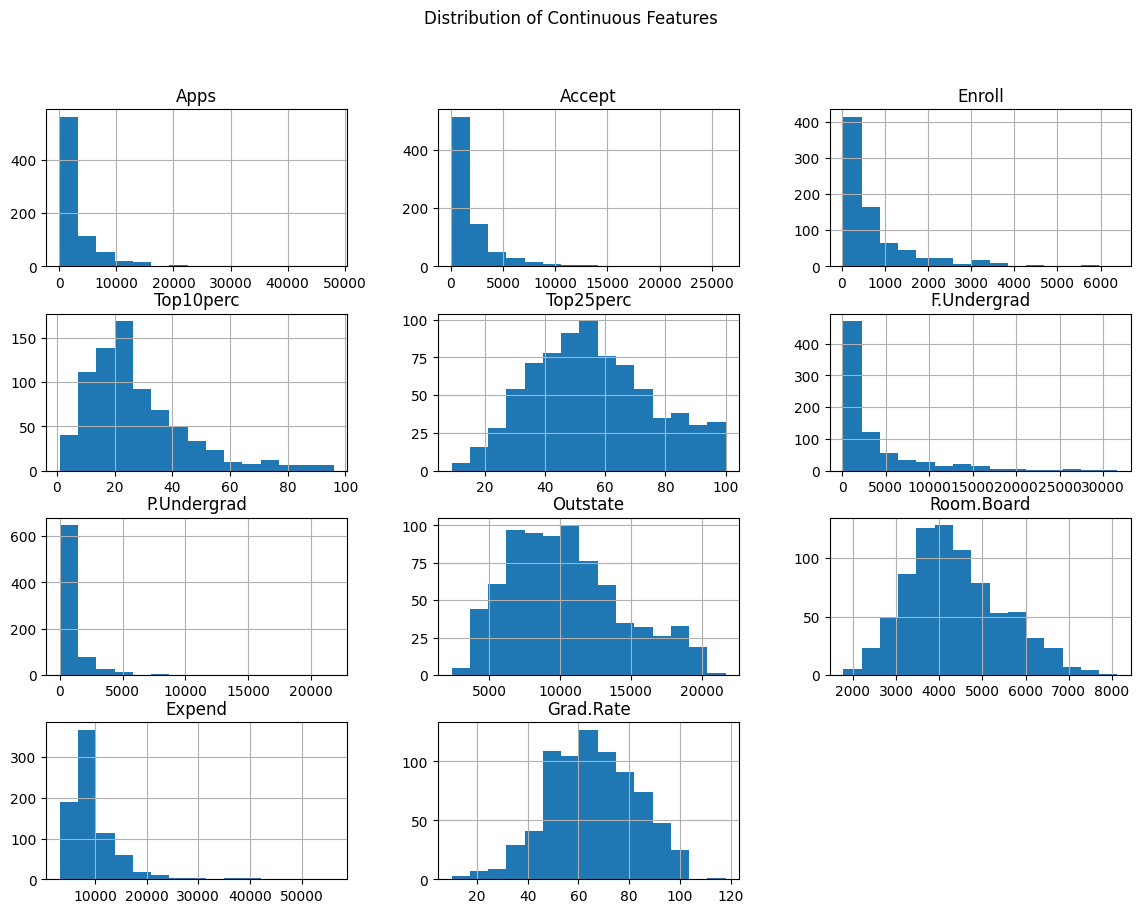

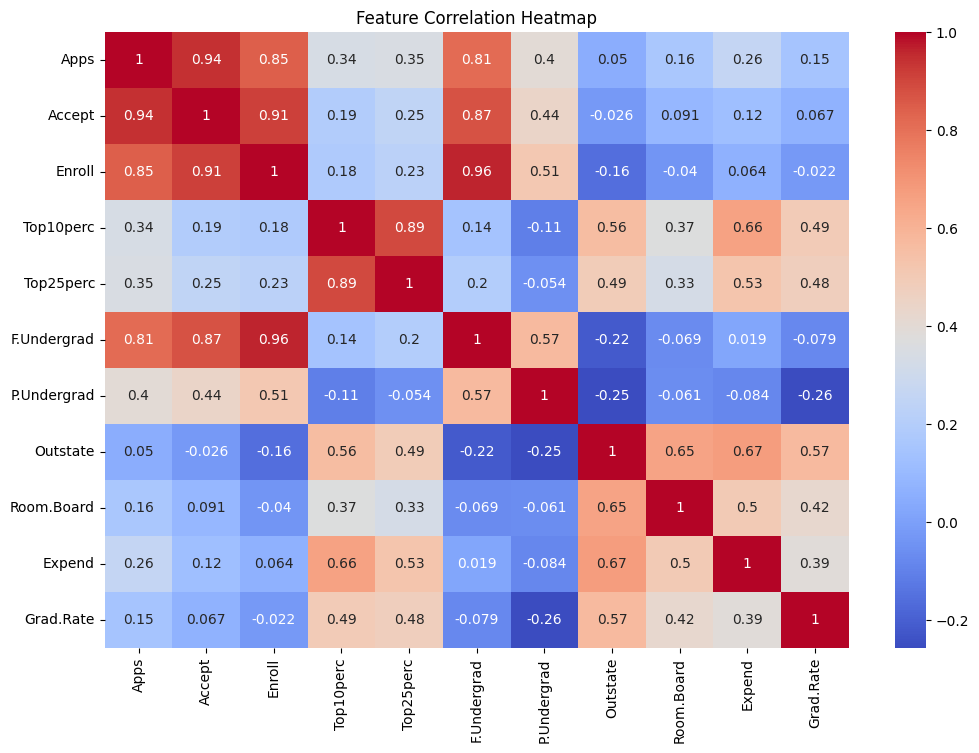


Model Accuracy: 0.9423076923076923

Confusion Matrix:
 [[ 35   8]
 [  1 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.93      0.99      0.96       113

    accuracy                           0.94       156
   macro avg       0.95      0.90      0.92       156
weighted avg       0.94      0.94      0.94       156


Files saved successfully:
✔ classification_results.json
✔ college_predictions.csv


In [1]:
# ==============================
# 1️⃣ Import Libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import json

# ==============================
# 2️⃣ Load College Dataset
# ==============================
url = "/College.csv"
college = pd.read_csv(url)

print("Dataset Shape:", college.shape)
print(college.head())

# ==============================
# 3️⃣ Exploratory Data Analysis (EDA)
# ==============================

# Basic info
print("\nDataset Info:")
print(college.info())

# Summary statistics
print("\nSummary Statistics:")
print(college.describe())

# Class distribution
print("\nTarget Variable Distribution:")
print(college['Private'].value_counts())

# Continuous columns
continuous_cols = [
    'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
    'F.Undergrad', 'P.Undergrad', 'Outstate',
    'Room.Board', 'Expend', 'Grad.Rate'
]

# Histograms
college[continuous_cols].hist(bins=15, figsize=(14,10))
plt.suptitle("Distribution of Continuous Features")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(college[continuous_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ==============================
# 4️⃣ Data Preprocessing
# ==============================

# Remove missing values
college.dropna(inplace=True)

# Encode target variable (Private: Yes/No → 1/0)
le = LabelEncoder()
college['Private_encoded'] = le.fit_transform(college['Private'])

# Features & Target
X = college[continuous_cols]
y = college['Private_encoded']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 5️⃣ Train Classification Model
# ==============================

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

# ==============================
# 6️⃣ Model Evaluation
# ==============================

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# ==============================
# 7️⃣ Save Results for Submission
# ==============================

# Save classification report as JSON
report_dict = classification_report(y_test, y_pred, output_dict=True)
with open("classification_results.json", "w") as f:
    json.dump(report_dict, f, indent=4)

# Save predictions
predictions = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

predictions.to_csv("college_predictions.csv", index=False)

print("\nFiles saved successfully:")
print("✔ classification_results.json")
print("✔ college_predictions.csv")
